In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/phgtk/Datasets/advertising_ef.csv")
df=df.drop(['Ad Topic Line','Timestamp'], axis=1)
df.head(50)


Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                      68.95  35.0     61833.90                256.09   
1                        NaN  31.0     68441.85                193.77   
2                      69.47  26.0     59785.94                236.50   
3                      74.15  29.0     54806.18                245.89   
4                      68.37  35.0     73889.99                225.58   
5                      59.99  23.0     59761.56                226.74   
6                      88.91  33.0     53852.85                208.36   
7                        NaN  48.0     24593.33                131.76   
8                      74.53  30.0          NaN                221.51   
9                      69.88  20.0     55642.32                183.82   
10                     47.64  49.0     45632.51                122.02   
11                     83.07  37.0     62491.01                230.87   
12                     69.57  48.0     51636.92                113.12   
13                     79.52  24.0     51739.63                214.23   
14                     42.95  33.0     30976.00                143.56   
15                     63.45  23.0     52182.23                140.64   
16                     55.39  37.0     23936.86                129.41   
17                     82.03  41.0     71511.08                187.53   
18                     54.70  36.0     31087.54                118.39   
19                     74.58  40.0          NaN                135.51   
20                     77.22  30.0     64802.33                224.44   
21                     84.59  35.0     60015.57                226.54   
22                     41.49  52.0     32635.70                164.83   
23                     87.29  36.0     61628.72                209.93   
24                     41.39  41.0     68962.32                167.22   
25                     78.74  28.0     64828.00                204.79   
26                     48.53  28.0     38067.08                134.14   
27                     51.95  52.0     58295.82                129.23   
28                     70.20  34.0     32708.94                119.20   
29                     76.02  22.0     46179.97                209.82   
30                     67.64  35.0     51473.28                267.01   
31                     86.41  28.0     45593.93                207.48   
32                     59.05  57.0     25583.29                169.23   
33                     55.60  23.0     30227.98                212.58   
34                     57.64  57.0     45580.92                133.81   
35                     84.37  30.0     61389.50                201.58   
36                     62.26  53.0     56770.79                125.45   
37                     65.82  39.0     76435.30                221.94   
38                     50.43  46.0     57425.87                119.32   
39                     38.93  39.0     27508.41                162.08   
40                     84.98  29.0          NaN                202.61   
41                     64.24  30.0     59784.18                252.36   
42                     82.52  32.0     66572.39                198.11   
43                     81.38  31.0     64929.61                212.30   
44                     80.47  25.0     57519.64                204.86   
45                     37.68  52.0     53575.48                172.83   
46                     69.62  20.0     50983.75                202.25   
47                     85.40  43.0     67058.72                198.72   
48                     44.33  37.0          NaN                123.72   
49                     48.01  46.0     54286.10                119.93   

                  City  Gender  \
0          Wrightburgh  Female   
1            West Jodi    Male   
2             Davidton  Female   
3       West Terrifurt    Male   
4         South Manuel  Female   
5                  NaN    Male   
6          Brandonstad  Female   
7     Po

In [2]:
#checking for null values
df.isnull().sum()
#dropping null values
df=df.dropna(axis=0)
df.shape

(956, 8)

In [3]:
#encoding gender into categorial variables
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
label_encoder_gender = LabelEncoder()
label_encoder_country = LabelEncoder()

# Encode Gender and Country columns
df['Gender_Encoded'] = label_encoder_gender.fit_transform(df['Gender'])
df['Country_Encoded'] = label_encoder_country.fit_transform(df['Country'])

# Perform inverse transformation for Country to get original values
df['Country_Decoded'] = label_encoder_country.inverse_transform(df['Country_Encoded'])
df1=pd.concat([df['Country_Encoded'],df['Country_Decoded']],axis=1)
print(df1)

      Country_Encoded         Country_Decoded
0                 215                 Tunisia
2                 184              San Marino
3                 103                   Italy
4                  96                 Iceland
6                 145                 Myanmar
...               ...                     ...
1004              116                 Lebanon
1005               26  Bosnia and Herzegovina
1006              140                Mongolia
1007               85               Guatemala
1008               28                  Brazil

[956 rows x 2 columns]


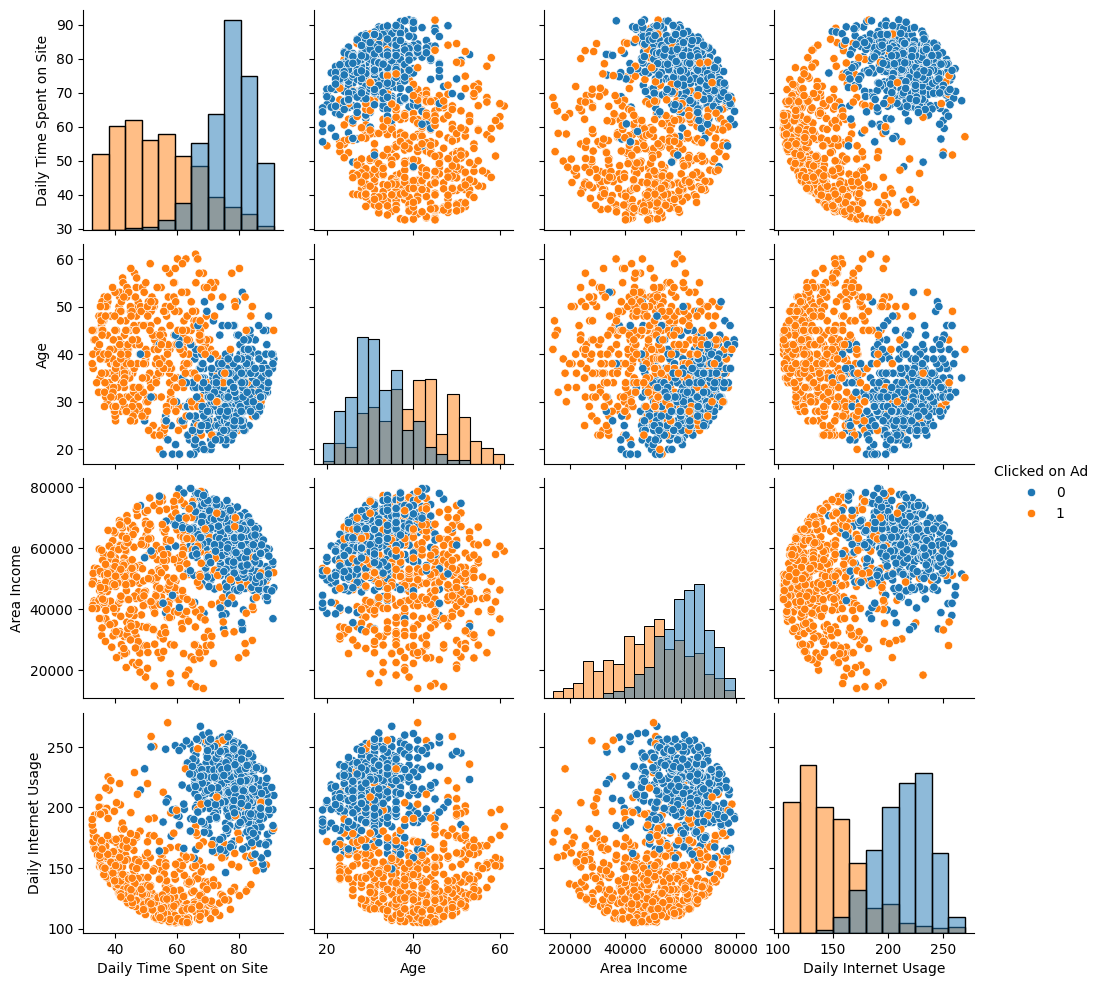

In [102]:
#Exploratory Data Visualisations
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
sns.pairplot(df[numerical_columns + ['Clicked on Ad']], hue='Clicked on Ad', diag_kind='hist')
plt.show()


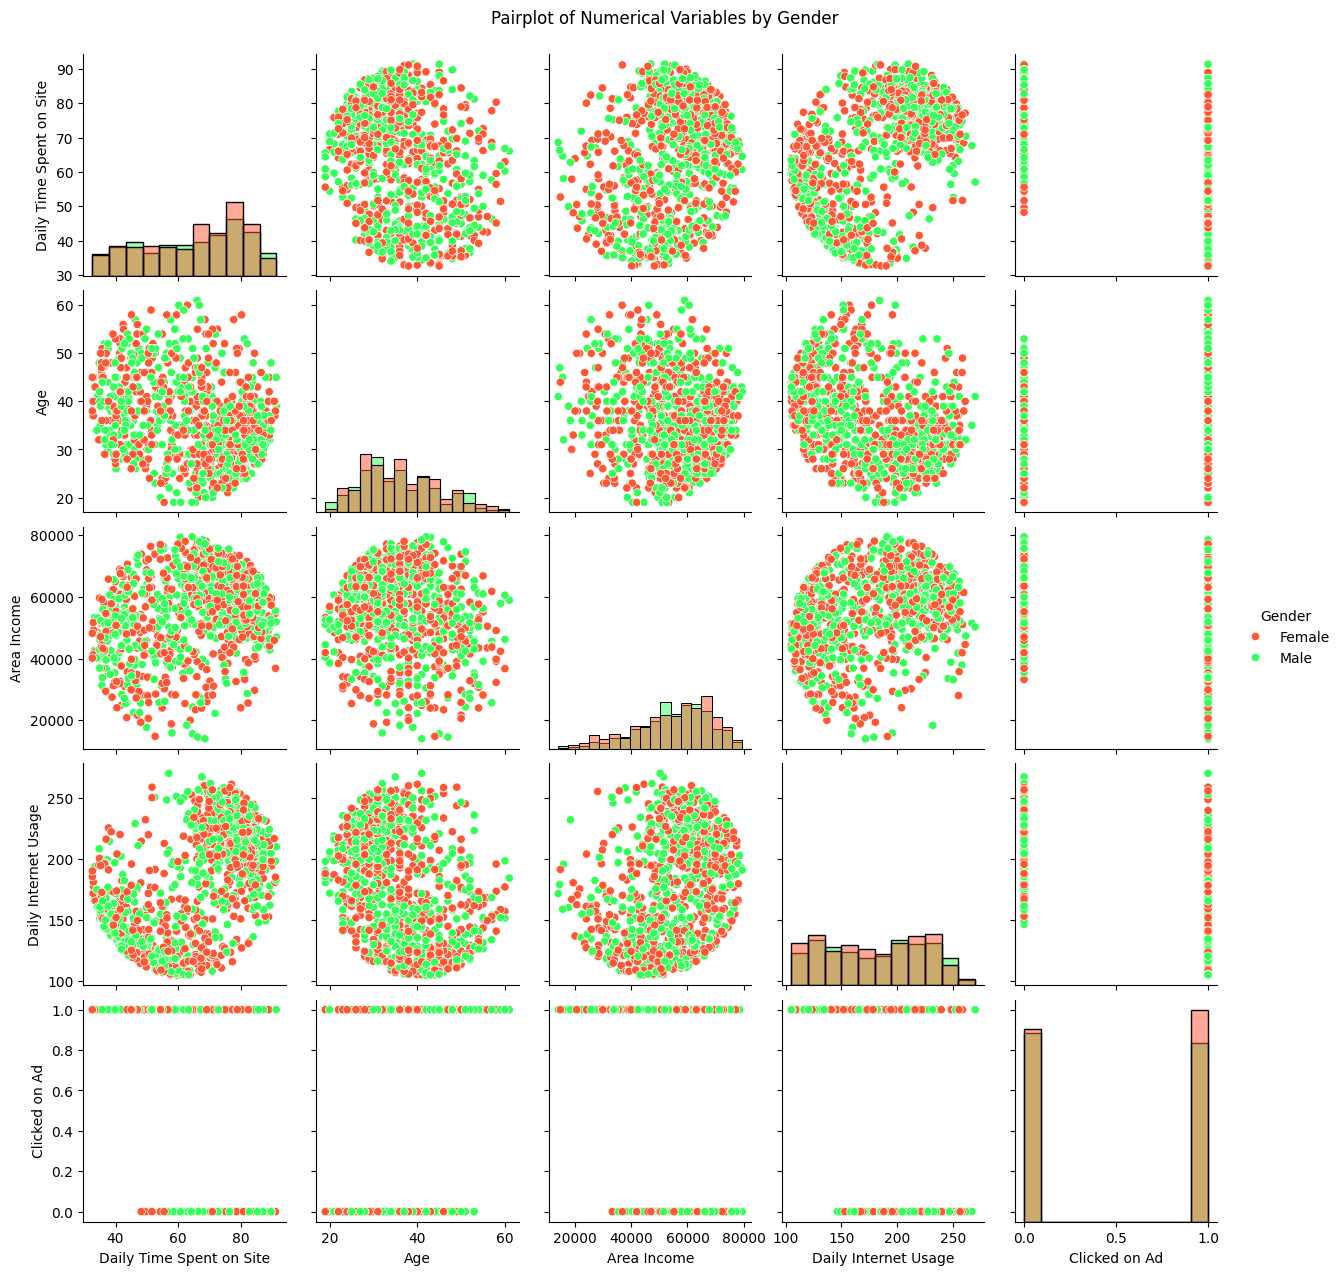

In [103]:
custom_palette = sns.color_palette(["#FF5733", "#33FF57"])
sns.pairplot(df[numerical_columns + ['Clicked on Ad','Gender']], hue='Gender', diag_kind='hist',palette=custom_palette)
plt.suptitle('Pairplot of Numerical Variables by Gender', y=1.02)
plt.show()

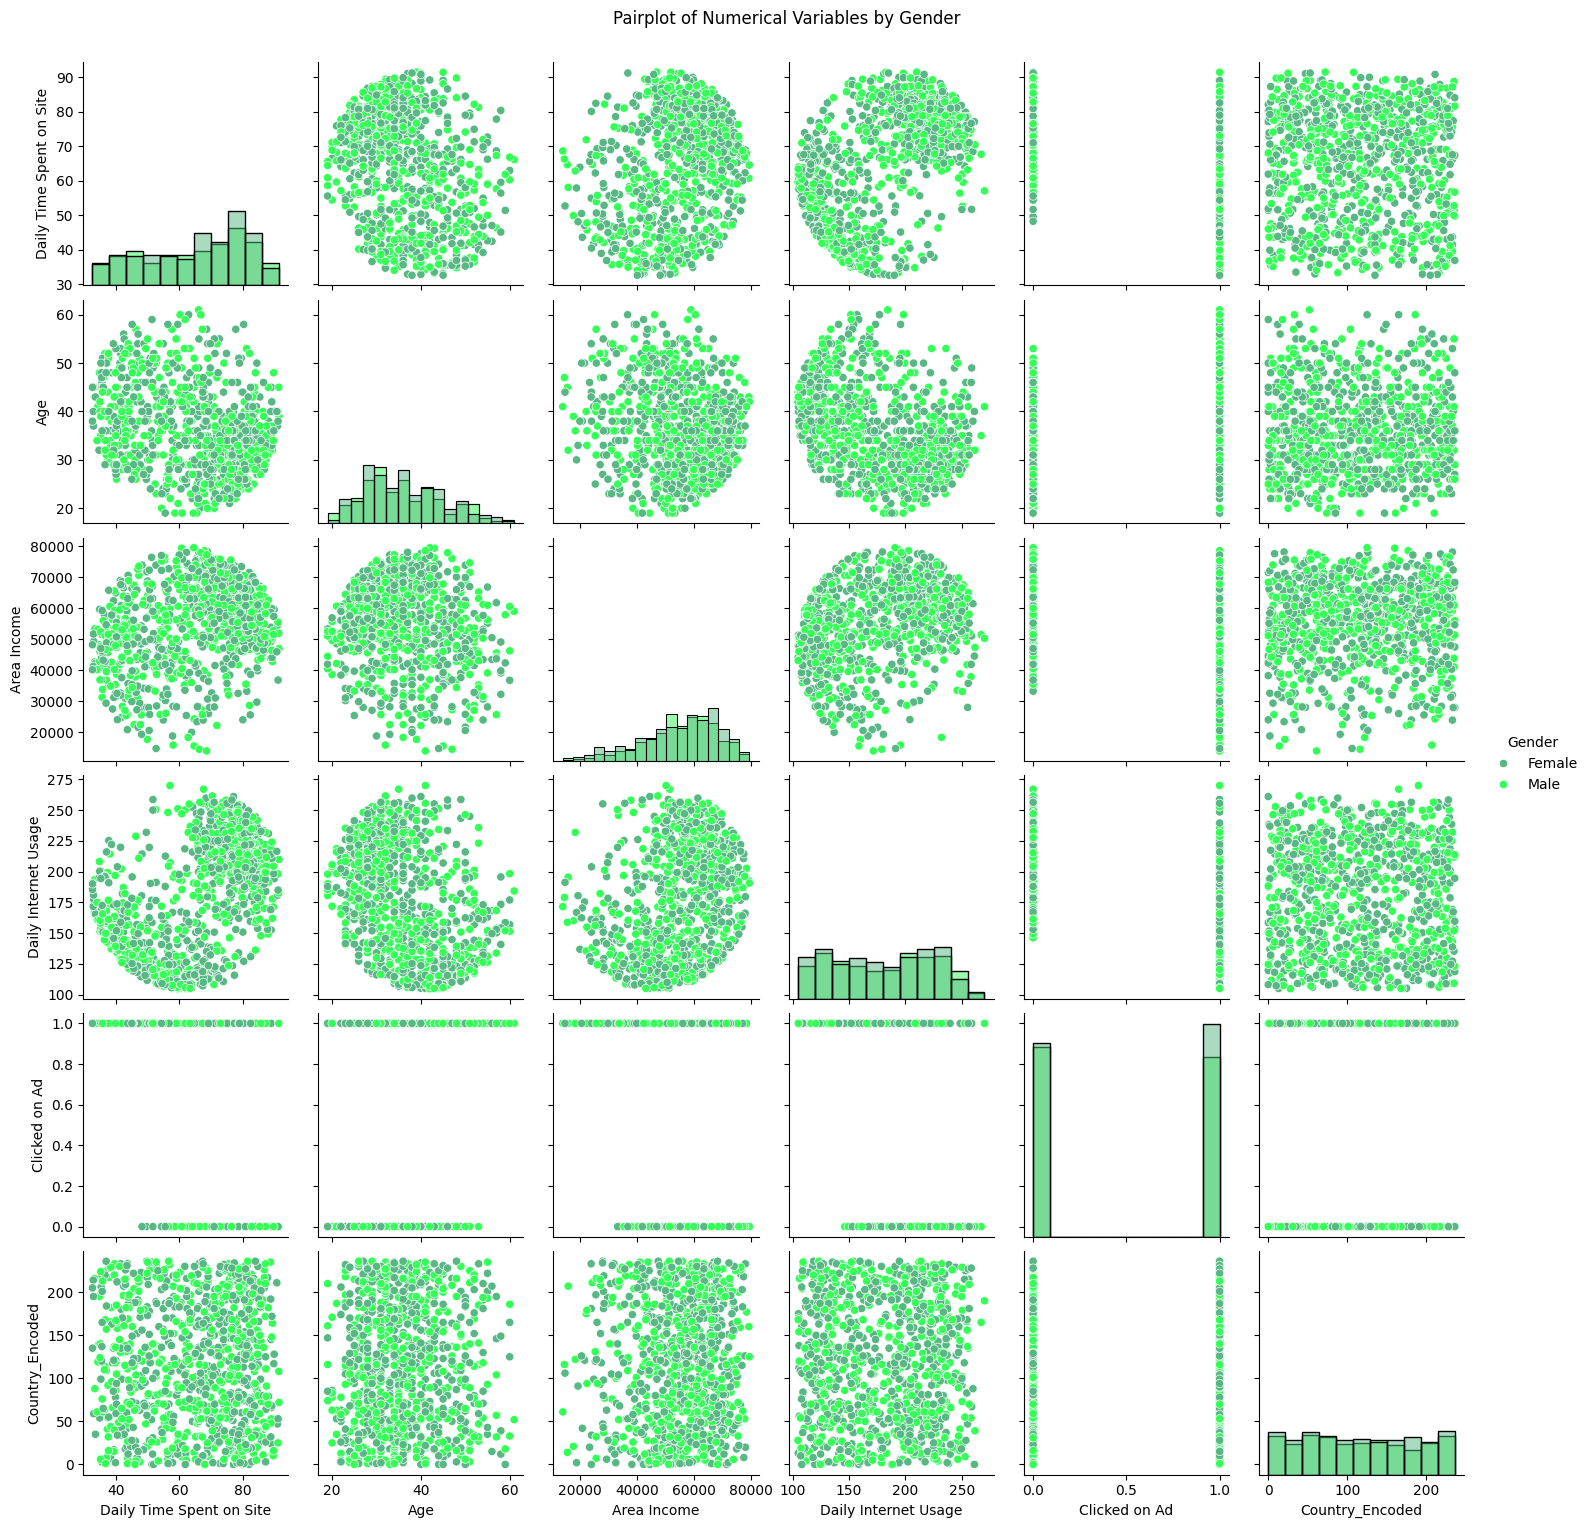

In [104]:
custom_palette = sns.color_palette(["#57b884", "#33FF57"])
sns.pairplot(df[numerical_columns + ['Clicked on Ad','Country_Encoded','Gender']], hue='Gender', diag_kind='hist',palette=custom_palette)
plt.suptitle('Pairplot of Numerical Variables by Gender', y=1.02)
plt.show()

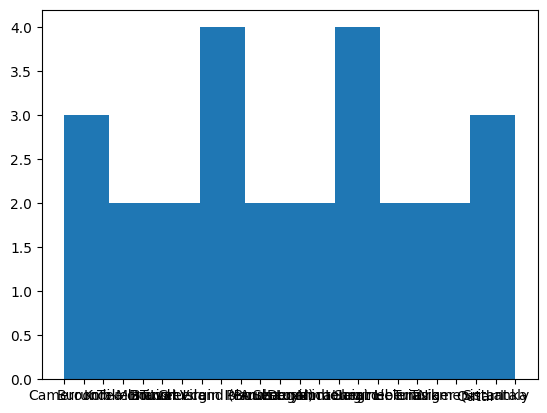

In [113]:
plt.hist(df.loc[20:50,"Country"])
plt.show()


In [136]:
#manually finding correlations
corr1 = df["Area Income"].corr(df["Daily Internet Usage"])
print(corr1)
corr2 = df["Daily Time Spent on Site"].corr(df["Daily Internet Usage"])
print(corr2)
#Grouping countries by clicks on Ad
clicks = df.groupby('Country')['Clicked on Ad'].sum()
print(clicks)

0.3246776082700528
0.515004018447203
Country
Afghanistan          5
Albania              4
Algeria              3
American Samoa       3
Andorra              2
                    ..
Wallis and Futuna    1
Western Sahara       4
Yemen                1
Zambia               3
Zimbabwe             4
Name: Clicked on Ad, Length: 237, dtype: int64


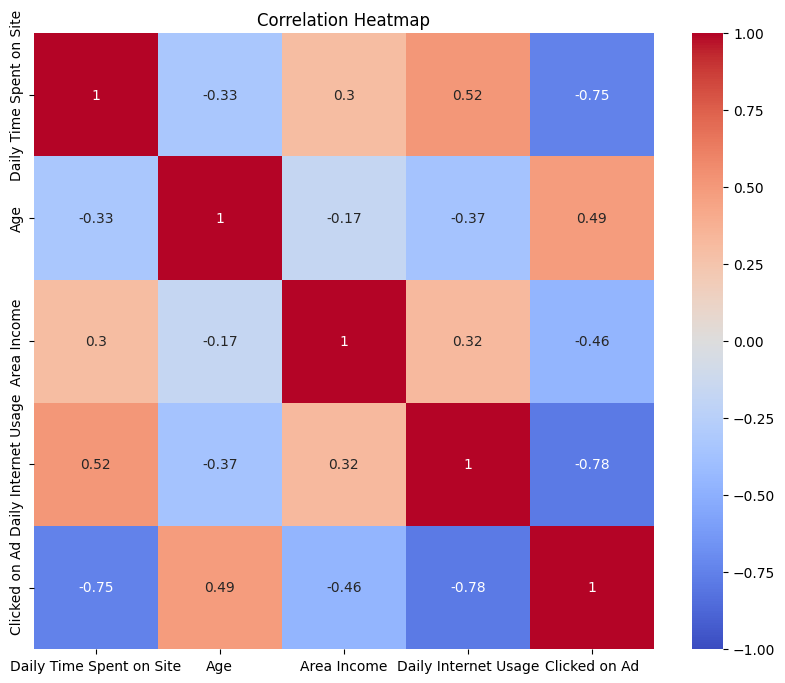

In [106]:
#mapping correlations in a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns + ['Clicked on Ad']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
#Training Testing Our Machine learning model
df_main=df.drop(["City","Gender","Country_Decoded"],axis=1)
df_main.head()
#df_main.head() is our encoded cleaned dataset


Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     68.95  35.0     61833.90                256.09   
2                     69.47  26.0     59785.94                236.50   
3                     74.15  29.0     54806.18                245.89   
4                     68.37  35.0     73889.99                225.58   
6                     88.91  33.0     53852.85                208.36   

      Country  Clicked on Ad  Gender_Encoded  Country_Encoded  
0     Tunisia              0               0              215  
2  San Marino              0               0              184  
3       Italy              0               1              103  
4     Iceland              0               0               96  
6     Myanmar              0               0              145

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
X=df_main.drop(['Clicked on Ad','Country'],axis=1)
y=df_main['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
Scaler=StandardScaler()
X_Scaled_train=Scaler.fit_transform(X_train)
X_Scaled_test=Scaler.fit_transform(X_test)

In [ ]:
model=LogisticRegression()
penalty=['l1', 'l2','elasticnet']
l1_ratio=np.linspace(0,1,20)
C=np.logspace(0,10,20)
param_grid = {
    'C': C,
    'l1_ratio':l1_ratio,
    'penalty': penalty, 
    'solver': ['liblinear', 'saga']  }
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
#Fitting Scaled trained and testing data
grid_model.fit(X_Scaled_train,y_train)

C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175:

In [14]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [16]:
y_pred=grid_model.predict(X_Scaled_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred) #Our model has 95 percent accuracy

0.9512195121951219

In [18]:
confusion_matrix(y_test,y_pred)

array([[137,   6],
       [  8, 136]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       143
           1       0.96      0.94      0.95       144

    accuracy                           0.95       287
   macro avg       0.95      0.95      0.95       287
weighted avg       0.95      0.95      0.95       287

